1. [Introduction](#introduction)
1. [Data Collection](#datacollection)
1. [Data Analysis](#dataanalysis)
1. [Data Preprocessing](#datapreprocessing)
1. [Model Training and Evaluation](#trainandevaluate)
    


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: lightgray;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Breast Cancer Dataset Classification
</h2>
</div>

# Introduction <a class="anchor" id="introduction"></a>
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous).

### Objective
* Understand the Dataset & cleanup (if required).
* Build classification models to predict whether the cancer type is Malignant or Benign.
* Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.


In this notebook, we will use GridSearchCV and Pipeline to assess multiple classifiers, fine-tune them, and evaluate the best one using evaluation metrics such as ROC and PR curves.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import Markdown, display

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [2]:
# to make this notebook's output identical at every run
np.random.seed(42)

# Data Collection <a class="anchor" id="datacollection"></a>

In [3]:
dataset = pd.read_csv('../input/breast-cancer-dataset/breast-cancer.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Analysis <a class="anchor" id="dataanalysis"></a>

Preprocess diagnosis from string to digit format and remove id column

In [4]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
dataset_le = dataset.copy()
dataset_le['diagnosis'] = le.fit_transform(dataset_le['diagnosis'])
dataset_le.drop(["id"], axis=1, inplace=True)

In [5]:
print(f'Rows:\t\t{dataset_le.shape[0]}',f'\nColumns:\t{dataset.shape[1]}')

Rows:		569 
Columns:	32


List the attributes, their types, and check for null values.

In [6]:
dataset_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
dataset_le.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
dataset_le.loc[:, dataset_le.columns != 'id'].describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [9]:
import plotly.express as px
labels = {1:'Benign', 0:'Malignant'}
fig = px.pie(dataset_le, names=dataset_le['diagnosis'].map({1:'Benign (0)', 0:'Malignant (1)'}), 
    title="Distribution of diagnosed patients",
    color_discrete_sequence=['green', 'red'])
fig.update_traces(textinfo='percent+value')
fig.show()

Analyze the correlation between attributes and their correlation with the diagnosis.

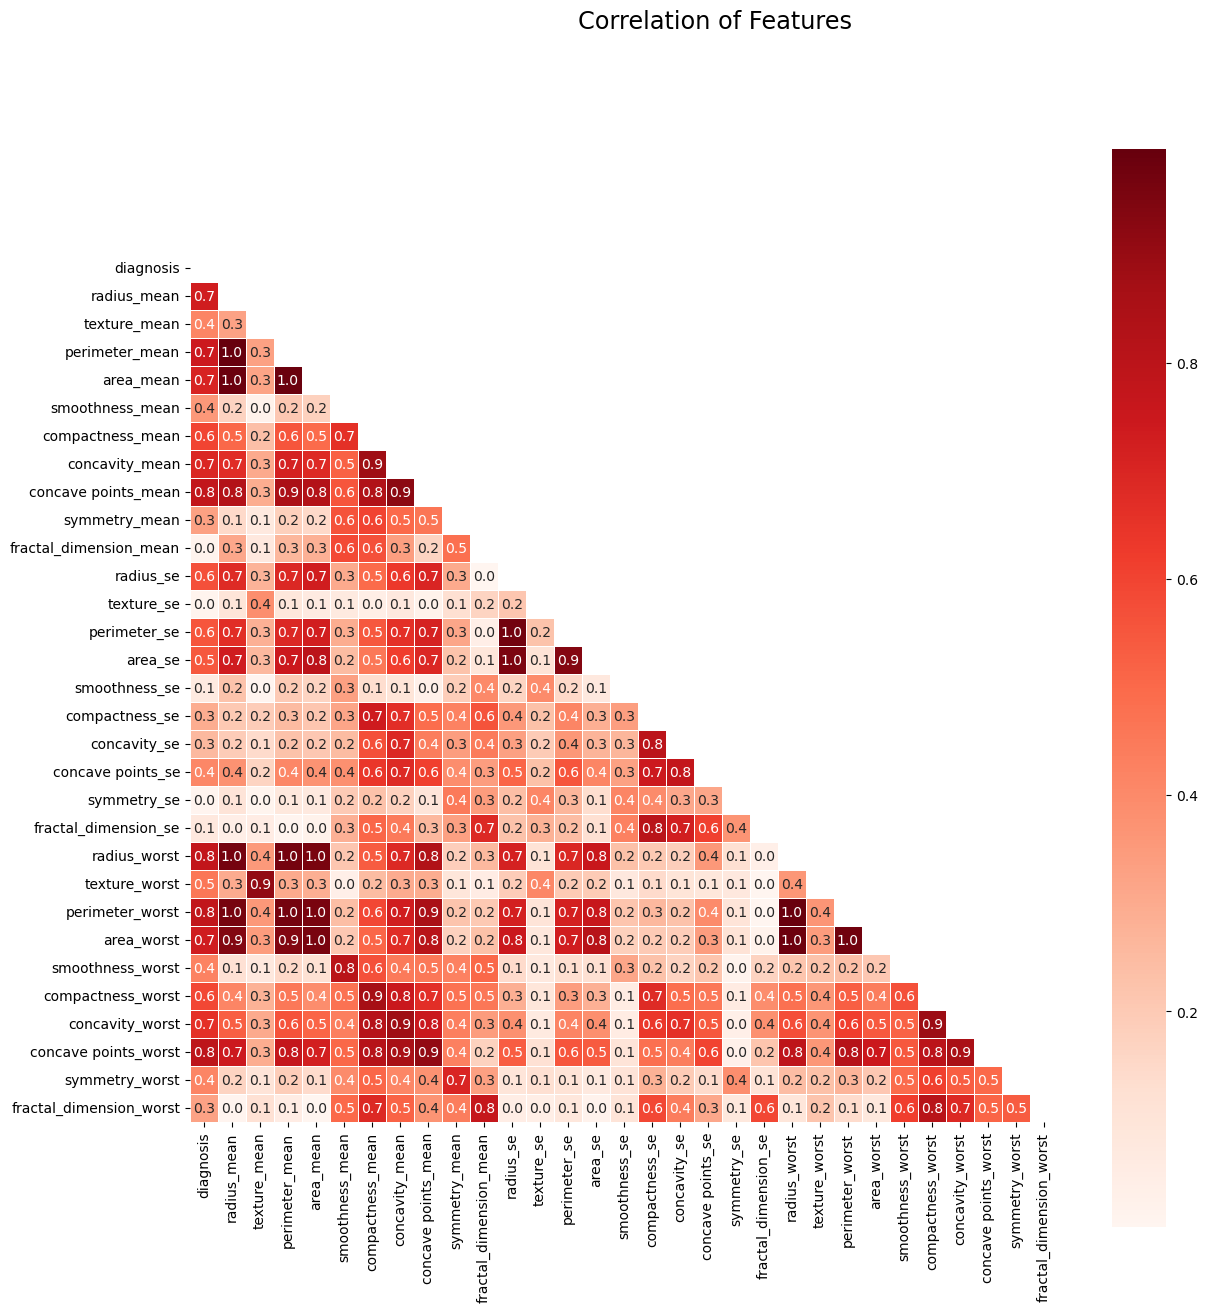

In [10]:
corr_matrix_abs = dataset_le.corr().abs()
mask = np.triu(np.ones_like(corr_matrix_abs, dtype=bool))
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr_matrix_abs, mask=mask, annot=True,\
    linewidths=0.5, fmt=".1f", ax=ax, cmap="Reds", square=True)
plt.suptitle('Correlation of Features', size='xx-large')
plt.show()

In [11]:
corr_matrix_abs_diagnosis = corr_matrix_abs['diagnosis'].sort_values(ascending=False)
print('Correlations between attributes and diagnosis:')
corr_matrix_abs_diagnosis_df = corr_matrix_abs_diagnosis.to_frame()
corr_matrix_abs_diagnosis_df

Correlations between attributes and diagnosis:


,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


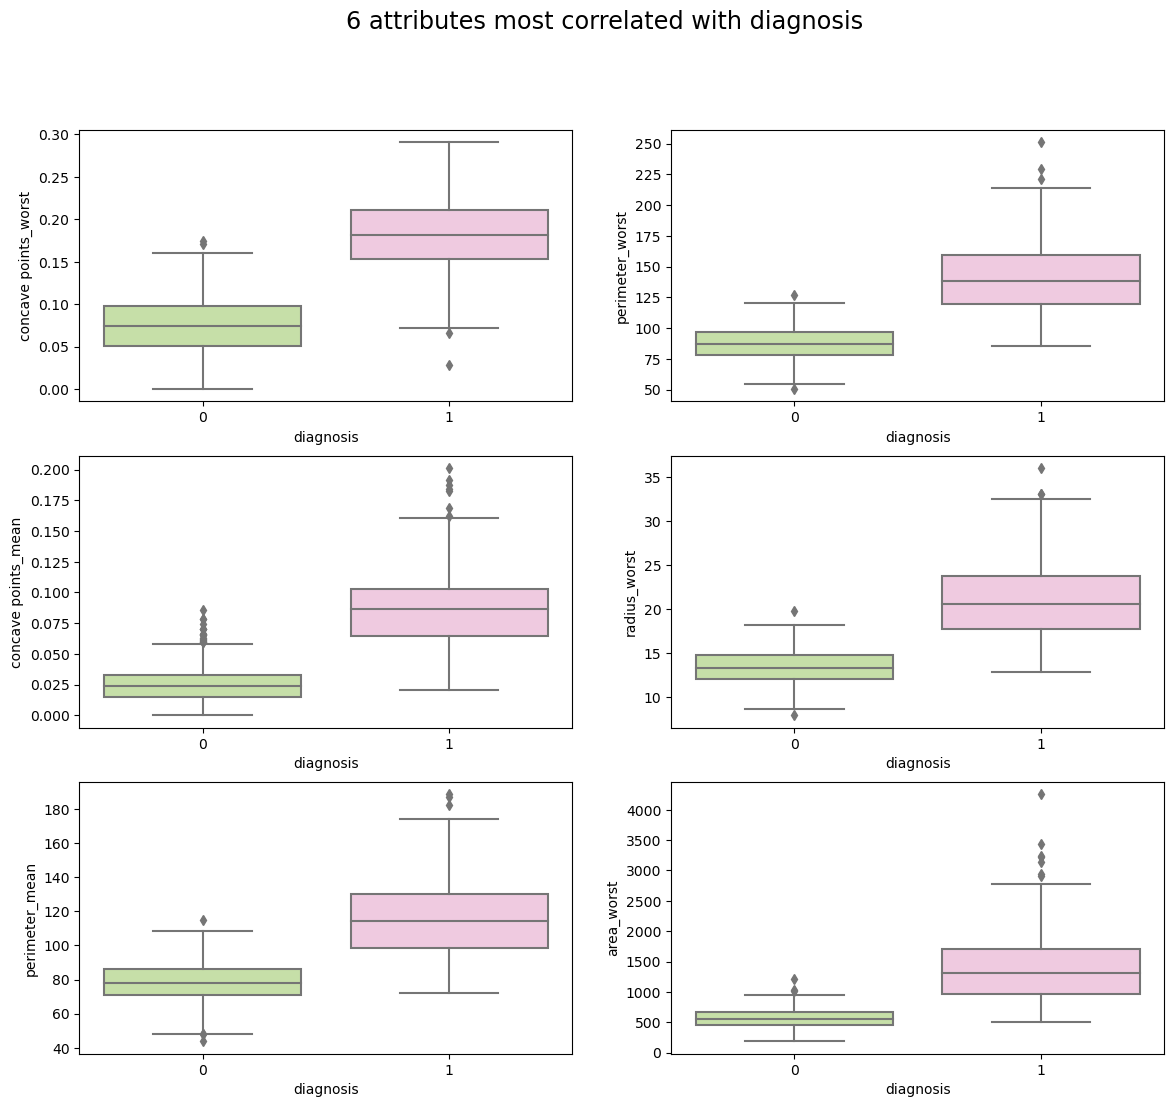

In [12]:
attributes_top_corr = corr_matrix_abs_diagnosis_df[1:7]
boxplots_rows = math.ceil(len(attributes_top_corr)/2)
fig, axs = plt.subplots(boxplots_rows, 2, figsize=(14,12))
for ax, item in zip(axs.flat, attributes_top_corr.iterrows()):
    attr_name = item[0]
    sns.boxplot(data=dataset_le, x="diagnosis", 
                y=attr_name, palette="PiYG_r", ax=ax)
fig.suptitle(
    f'{len(attributes_top_corr)} attributes most correlated with diagnosis', 
    size='xx-large')
plt.show()

We observe that the top 6 most correlated attributes have higher values for Malignant cases than for Benign cases.

# Data Preprocessing <a class="anchor" id="datapreprocessing"></a>

Split the dataset into training and testing sets to evaluate model performance.

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3)
for train_index, test_index in split.split(dataset_le, dataset_le['diagnosis']):
    strat_train_set = dataset_le.loc[train_index].copy()
    strat_test_set = dataset_le.loc[test_index].copy()
print(f'Train dataset rows: {len(strat_train_set)}', 
      f'\nTest dataset rows: {len(strat_test_set)}')

Train dataset rows: 398 
Test dataset rows: 171


Create a class called "CorrelatedFeaturesRemover" to use in the Pipeline.

In [14]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CorrelatedFeaturesRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.95):
        self.threshold = threshold
        self.correlated_features = set()
    
    def fit(self, X, y=None):
        corr_matrix = X.corr().abs()
        upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > self.threshold)]
        self.correlated_features.update(to_drop)
        return self
    
    def transform(self, X, y=None):
        return X.drop(columns=self.correlated_features)

# Model Training and Evaluation <a class="anchor" id="trainandevaluate"></a>

Prepare the train and test sets for modeling.

In [15]:
X_train = strat_train_set.drop(['diagnosis'], axis=1)
y_train = strat_train_set['diagnosis'].copy()
X_test = strat_test_set.drop(['diagnosis'], axis=1)
y_test = strat_test_set['diagnosis'].copy()

Create functions to display the evaluation metrics and classification reports.

In [16]:
def display_cv_results(cv_results):
    cv_results_df = pd.DataFrame(cv_results)
    cv_results_df['model'] = (cv_results_df['params']
                               .astype('str')
                               .str.findall('(?<=\'model\': )\w+(?=\()')
                               .apply(', '.join))
    mean_columns = cv_results_df.filter(regex='^mean_test').columns.to_list()
    filtered_columns_womodel = np.concatenate((mean_columns, ['param_model']))
    filtered_columns = np.concatenate((['model'], filtered_columns_womodel))
    display(
        cv_results_df
            .sort_values(by=['mean_test_f1'], ascending=False)
            .groupby('model')
            .first()
            .reindex(columns=filtered_columns)
            .loc[:, filtered_columns_womodel]
            .sort_values(by=['mean_test_f1'], ascending=False)
            .style
            .background_gradient(cmap='viridis'))

In [17]:
import ipywidgets as widgets
from ipywidgets import GridspecLayout
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score, classification_report, f1_score, mean_squared_error, precision_score, recall_score

def display_evalreport(y_actual, y_predicted, set_name):
    accuracy_train = accuracy_score(y_actual, y_predicted)
    matrix_train = confusion_matrix(y_actual, y_predicted)
    classif_report_df = pd.DataFrame(classification_report(y_actual, y_predicted, output_dict=True)).T
    classif_report_df['support'] = classif_report_df.support.apply(int)
    display(Markdown(f'<span style="color: black;"><h2>Evaluation on the {set_name}</h2></span>'))
    display(pd.DataFrame([{
            'Accuracy': '{:.2f}%'.format(accuracy_train*100),
            }]).T.style.hide_columns())
    out_box1 = widgets.Output()
    out_box2 = widgets.Output()
    with out_box1:
        display(classif_report_df
                .style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])
                .set_properties(**{'font-size': '9pt'})
                .set_table_styles([{
                    'selector': 'th, td',
                    'props': 'padding: 7px'
                }]))
        
        dict(
        props=[
            ('border-collapse', 'separate'), 
            ('border-spacing',  '10px 50px')
        ]
    )
    with out_box2:
        plt.figure(figsize=(2,2), dpi=100)
        ax = sns.heatmap(matrix_train, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", cmap='viridis')
        ax.set_xlabel("Predicted", fontsize=10, labelpad=5)
        ax.set_ylabel("Actual", fontsize=10, labelpad=5)
        ax.set_title("Confusion Matrix", fontsize=10, pad=10)
        plt.show()
    grid = GridspecLayout(1, 3)
    grid[0, 0] = out_box1
    grid[0, 1] = out_box2
    display(grid)

In [18]:
from sklearn import metrics

def analyze_roc(mod,X1,y1,X2,y2):
    ytrain_pred = mod.predict_proba(X1)
    ytest_pred = mod.predict_proba(X2)
    # Results have probabilities for results [0,1]
    roc_train = metrics.roc_curve(y1, ytrain_pred[:,1])
    roc_test = metrics.roc_curve(y2, ytest_pred[:,1])
    roc_auc_train = metrics.roc_auc_score(y1, ytrain_pred[:,1])
    roc_auc_test = metrics.roc_auc_score(y2, ytest_pred[:,1])

    print('ROC Area-under-curve for training set: {:0.3}'.format(roc_auc_train))
    print('ROC Area-under-curve for validation set: {:0.3}'.format(roc_auc_test))

    fig = plt.figure(1, figsize=[6,6])
    plt.plot(roc_train[0], roc_train[1], label='Train set', c='b')
    plt.plot(roc_test[0], roc_test[1], label='Validation set', c='r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

In [19]:
def analyze_prec_recall(mod,X1,y1,X2,y2):
    ytrain_pred = mod.predict_proba(X1)
    ytest_pred = mod.predict_proba(X2)
    # Results have probabilities for results [0,1]
    pr_train = metrics.precision_recall_curve(y1, ytrain_pred[:,1])
    pr_test = metrics.precision_recall_curve(y2, ytest_pred[:,1])
    pr_auc_train = metrics.average_precision_score(y1, ytrain_pred[:,1])
    pr_auc_test = metrics.average_precision_score(y2, ytest_pred[:,1])

    print('Avg. precision score for training set: {:0.3}'.format(pr_auc_train))
    print('Avg. precision score for validation set: {:0.3}'.format(pr_auc_test))

    fig = plt.figure(1, figsize=[6,6])
    plt.step(pr_train[1], pr_train[0], label='Train set',c='b')
    plt.step(pr_test[1], pr_test[0], label='Validation set',c='r')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.show()

Create a Pipeline object to encapsulate data preprocessing and modeling steps.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, make_scorer
pipeline = Pipeline([
    ('correlated_features_remover', CorrelatedFeaturesRemover()),
    ('scaler', StandardScaler()),
    ('model', None)
])
precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

Use GridSearchCV to assess multiple models with default hyperparameters and compare their performance.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = [
    {'model': [
        SGDClassifier(),
        LogisticRegression(),
        SVC(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        xgb.XGBClassifier(),
        GaussianNB()
    ]}]
grid_search = GridSearchCV(pipeline, params, cv=5, scoring=custom_scoring, refit='f1')
grid_search.fit(X_train, y_train)
display_cv_results(grid_search.cv_results_)

,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,param_model
model,,,,,
LogisticRegression,0.972310,0.992308,0.928606,0.958950,LogisticRegression()
RandomForestClassifier,0.962215,0.967852,0.922356,0.944185,RandomForestClassifier()
SVC,0.957215,0.962005,0.916106,0.938250,SVC()
SGDClassifier,0.957215,0.947766,0.925971,0.936374,SGDClassifier()
KNeighborsClassifier,0.957247,0.983750,0.894321,0.936181,KNeighborsClassifier()
XGBClassifier,0.942120,0.938795,0.891686,0.914395,"XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, gamma=None, gpu_id=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=None, num_parallel_tree=None, predictor=None, random_state=None, reg_alpha=None, reg_lambda=None, ...)"
GaussianNB,0.919589,0.904188,0.875702,0.888729,GaussianNB()
DecisionTreeClassifier,0.899335,0.854001,0.864560,0.858532,DecisionTreeClassifier()


Fine-tune the classifiers using cross-validation and GridSearchCV.

In [22]:
from scipy.stats import expon, randint, geom, reciprocal
params_tune = [
    {
        'model': [SVC()],
        'model__kernel': ['linear', 'poly', 'rbf'],
        'model__C': np.logspace(-5, 5, 7),
        'model__gamma': expon.rvs(scale=0.1, size=7)
    }, 
    {
        'model': [LogisticRegression()],
        'model__solver': ['lbfgs', 'liblinear'],
        'model__C': expon.rvs(scale=0.5, size=30),
#         'correlated_features_remover': [None]
    }, 
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': randint(low=1, high=300).rvs(6),
        'model__max_features': randint(low=1, high=23).rvs(6),
    }
]
grid_search_tuned = GridSearchCV(pipeline, params_tune, cv=5, 
                                 scoring=custom_scoring, refit='f1')
grid_search_tuned.fit(X_train, y_train)
display_cv_results(grid_search_tuned.cv_results_)

,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,param_model
model,,,,,
LogisticRegression,0.974842,0.992308,0.937301,0.963813,"LogisticRegression(C=1.430004665746944, solver='liblinear')"
SVC,0.969778,0.974916,0.937301,0.955513,SVC()
RandomForestClassifier,0.962247,0.967663,0.922356,0.944288,RandomForestClassifier()


Evaluate the best model using the testing set and various evaluation metrics.

Best_model,"LogisticRegression(C=1.430004665746944, solver='liblinear')"
Params,"{'model': LogisticRegression(C=1.430004665746944, solver='liblinear'), 'model__C': 1.430004665746944, 'model__solver': 'liblinear'}"


<span style="color: black;"><h2>Evaluation on the Train Set</h2></span>

Accuracy,98.74%


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

<span style="color: black;"><h2>Evaluation on the Test Set</h2></span>

Accuracy,96.49%


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

ROC Area-under-curve for training set: 0.997
ROC Area-under-curve for validation set: 0.997


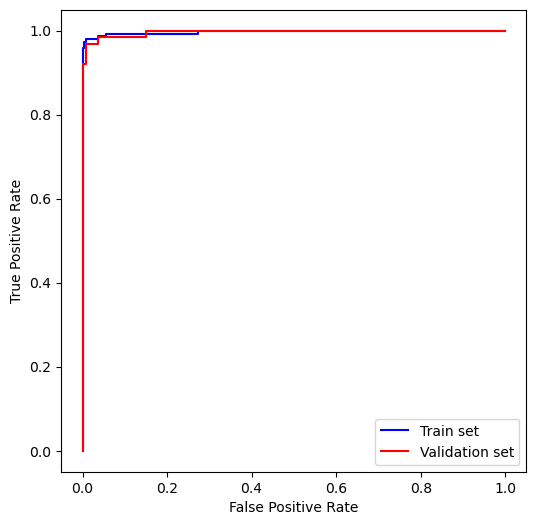

Avg. precision score for training set: 0.997
Avg. precision score for validation set: 0.995


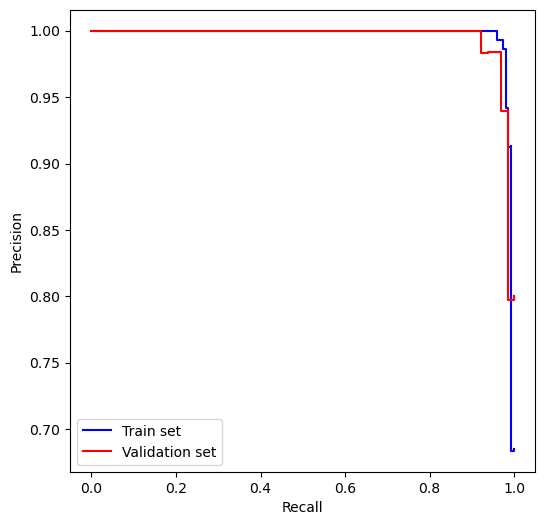

In [23]:
final_model = grid_search_tuned.best_estimator_
y_train_predicted = final_model.predict(X_train)
y_test_predicted = final_model.predict(X_test)
model_str = final_model.get_params()['model']
display(pd.DataFrame([{
            'Best_model': model_str,
            'Params': grid_search_tuned.best_params_
            }]).T.style.set_properties(**{'text-align':'left'}).hide_columns())
display_evalreport(y_train, y_train_predicted, "Train Set")
display_evalreport(y_test, y_test_predicted, "Test Set")
analyze_roc(final_model, X_train, y_train, X_test, y_test)
analyze_prec_recall(final_model, X_train, y_train, X_test, y_test)

In conclusion, the best model is LogisticRegression, which achieves high performance on both ROC and PR curves.